In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [9]:
uni = pd.read_parquet('USDC_USDT_hourly_metrics.parquet').query('feeTier == 100')
crv = pd.read_parquet('curve_3pool_hourly.parquet')

In [10]:
uni

,hour,datetime,pool,feeTier,swap_count,net_amount0,net_amount1,net_amountUSD,price1_per_0,price0_per_1,...,liquidity,tvlUSD,volumeUSD,feesUSD,open,high,low,close,sqrtPrice,depeg_bps
0,1640995200,2022-01-01 00:00:00+00:00,0x3416cf6c708da44db2624d63ea0aaef7113527c6,100,23,873462.918075,-873331.114164,1.270926e+06,0.999993,1.000007,...,4.303942e+17,2.020380e+08,0.000000,0.000000,1.000003,1.000008,1.000003,1.000007,7.922787e+28,-0.074302
1,1640998800,2022-01-01 01:00:00+00:00,0x3416cf6c708da44db2624d63ea0aaef7113527c6,100,20,-348445.942118,348605.281049,1.616357e+06,0.999994,1.000006,...,4.282098e+17,2.017105e+08,0.000000,0.000000,1.000007,1.000009,1.000005,1.000006,7.922793e+28,-0.057971
2,1641002400,2022-01-01 02:00:00+00:00,0x3416cf6c708da44db2624d63ea0aaef7113527c6,100,28,-282872.303607,282997.773372,1.269157e+06,0.999996,1.000004,...,4.282098e+17,2.017107e+08,0.000000,0.000000,1.000006,1.000006,1.000004,1.000004,7.922799e+28,-0.044757
3,1641006000,2022-01-01 03:00:00+00:00,0x3416cf6c708da44db2624d63ea0aaef7113527c6,100,15,-109532.952488,109587.470086,5.497716e+05,0.999996,1.000004,...,4.282098e+17,2.017107e+08,0.000000,0.000000,1.000004,1.000004,1.000003,1.000004,7.922801e+28,-0.039640
4,1641009600,2022-01-01 04:00:00+00:00,0x3416cf6c708da44db2624d63ea0aaef7113527c6,100,18,-732823.087413,733015.379684,1.939076e+06,0.999999,1.000001,...,4.282098e+17,2.017109e+08,0.000000,0.000000,1.000004,1.000006,1.000000,1.000001,7.922814e+28,-0.005410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142292,1769490000,2026-01-27 05:00:00+00:00,0x3416cf6c708da44db2624d63ea0aaef7113527c6,100,83,222709.791552,-222913.636985,2.280145e+05,1.001005,0.998996,...,1.737375e+16,3.223849e+07,228014.533628,22.801453,0.998970,0.998996,0.998970,0.998996,7.926795e+28,10.047480
142293,1769493600,2026-01-27 06:00:00+00:00,0x3416cf6c708da44db2624d63ea0aaef7113527c6,100,37,32098.649538,-32127.098645,3.740425e+04,1.001001,0.999000,...,1.737442e+16,3.223916e+07,37404.254315,3.740425,0.998996,0.999000,0.998996,0.999000,7.926781e+28,10.010477
142294,1769497200,2026-01-27 07:00:00+00:00,0x3416cf6c708da44db2624d63ea0aaef7113527c6,100,48,674320.220205,-674900.176849,7.000493e+05,1.000928,0.999072,...,1.913585e+16,3.223854e+07,700049.321970,70.004932,0.999004,0.999072,0.999004,0.999072,7.926494e+28,9.284875
142295,1769500800,2026-01-27 08:00:00+00:00,0x3416cf6c708da44db2624d63ea0aaef7113527c6,100,26,-325878.481903,326222.231384,3.559927e+05,1.000963,0.999038,...,1.913585e+16,3.223887e+07,355992.653493,35.599265,0.999073,0.999074,0.999038,0.999038,7.926629e+28,9.625955


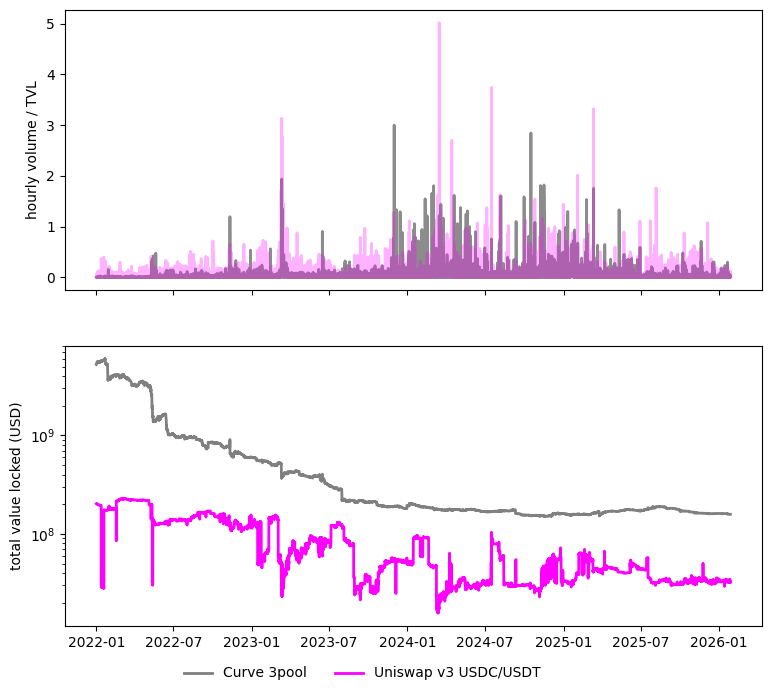

In [65]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(9,8), sharex=True)
crv = crv[crv.index >= '2022-01-01']
ax1.plot(crv['hourlyVolumeUSD'] / crv['totalValueLockedUSD'], label = 'Curve 3pool', color = 'grey', alpha = 0.9, lw = 2)
ax1.plot(uni.datetime, uni['net_amountUSD']/uni['tvlUSD'], color ='magenta', label = 'Uniswap v3 USDC/USDT', alpha = 0.3, lw = 2)
ax2.plot(crv['totalValueLockedUSD'], label = 'Curve 3pool', color = 'grey', lw = 2)
ax2.plot(uni.datetime, uni['tvlUSD'], label = 'Uniswap v3 USDC/USDT', color = 'magenta', lw = 2)
# ax1.legend(frameon = False, ncols = 2, bbox_to_anchor = (0.8,-0.1))
ax1.set_ylabel('hourly volume / TVL')
ax2.set_ylabel('total value locked (USD)')
ax2.set_yscale('log')
ax2.legend(frameon = False, ncols = 2, bbox_to_anchor = (0.7,-0.1))
plt.savefig('3pool_uniswap_volume_tvl', transparent = True, dpi = 200, bbox_inches = 'tight')